# Лабораторная работа №1

## Здание №1.1

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Найдем машинную бесконечность:

In [5]:
c = 2.0
while np.isfinite(2*c):
    c *= 2
print(f"Машинная бесконечность: {c:.3e}")

Машинная бесконечность: 8.988e+307


Найдем машиный ноль:

In [6]:
x = 1.0

while x/2 > 0:
    x /=2
print(f"Машинный ноль: {x}")

Машинный ноль: 5e-324


Найдем машинный эпсилон:

In [7]:
eps = 1.0
while 1 + eps / 2 != 1:
    eps /= 2
print(f"Машинный эпсилон: {x}")

Машинный эпсилон: 5e-324


## Задание №1.2

$F(x) = x\cos(x),\ x\in[1, 4]$

$S(x, N) = \sum\limits_{n=0}^{N} \dfrac{f^{(n)}(0)}{n!}{x^n}$

In [8]:
def F(x):
    return x * np.cos(x)

def decompose(x, N):
    '''
    Итератор возвращает первые N членов
    разложения функции F(x) в ряд Тейлора.
    '''
    fact = 1.0
    for i in range(1, 2*(N+1), 2):
        fact *= i
        k = (-1)**(i%4 == 3) * (i)
        yield k * x ** i / fact
        fact *= (i + 1)

def S(x, N):
    '''
    N-ая частичная сумма ряда Тейлора
    для функции F(x). 
    '''
    res = 0.0
    for e in decompose(x, N):
        res += e
    return res
S(0, 10)

0.0

In [9]:
a = 1
b = 4
N = 5
x = np.linspace(a, b, 1001, endpoint=True)
y_F = F(x)
y = [S(x, i) for i in range(0, N + 1)]
Dt = [abs(y[i] - y_F) for i in range(0, N + 1)]
dt = [Dt[i] / abs(y[i]) for i in range(0, N + 1)]

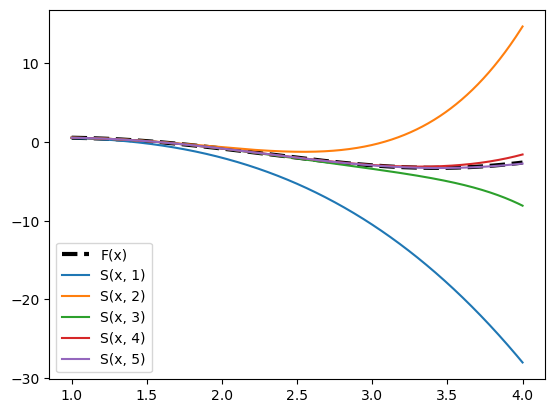

In [10]:
plt.plot(x, y_F, "k--", linewidth=3, label="F(x)")
for i in range(1, N + 1):
    plt.plot(x, y[i], label=f"S(x, {i})")

plt.legend()

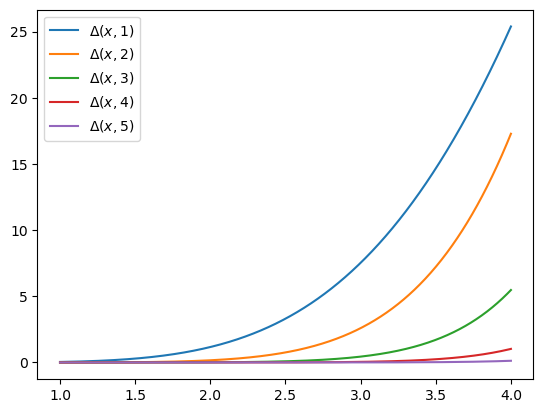

In [11]:
for i in range(1, N + 1):
    plt.plot(x, Dt[i], label=f"$\Delta(x,{i})$")
plt.legend()

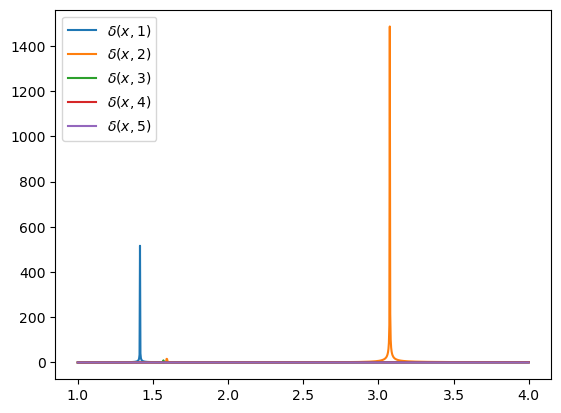

In [12]:
for i in range(1, N + 1):
    plt.plot(x, dt[i], label=f"$\delta(x,{i})$")
plt.legend(loc=2)

In [13]:
center = (a + b) / 2
S

<function __main__.S(x, N)>